In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',50)
pd.set_option('display.width',100)
pd.set_option('display.max_colwidth',250)

### 피벗 테이블
+ 소량의 데이터는 별 다른 수고없이 통계분석 기능
+ 하지만, 대량의 데이터는 통계분석 하기 어려움
+ 수 많은 데이터 중에서 원하는 데이터만 골라서 테이블을 재구성한 것을 의미
+ pivot(행, 열, 대상)
+ pivot_table()

In [2]:
city = ['서울', '서울', '서울', '부산', '부산', '부산', '인천', '인천']
year = [2015, 2010, 2005, 2015, 2010, 2005, 2015, 2010]
pop = [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203]
region = ['수도권', '수도권', '수도권', '경상권', '경상권', '경상권', '수도권', '수도권']

data = {'도시':city, '연도':year,'인구':pop,'지역':region}

In [3]:
df = pd.DataFrame(data, index=np.arange(1,9))
df.head()

,도시,연도,인구,지역
1,서울,2015,9904312,수도권
2,서울,2010,9631482,수도권
3,서울,2005,9762546,수도권
4,부산,2015,3448737,경상권
5,부산,2010,3393191,경상권


In [43]:
# 도시별 연도별 인구수
pv = df.pivot('도시', '연도', '인구')

for c in pv.columns:
    pv[c] = pv[c].apply(lambda x:('{:,.0f}').format(x))
pv

연도,2005,2010,2015
도시,,,
부산,"3,512,547","3,393,191","3,448,737"
서울,"9,762,546","9,631,482","9,904,312"
인천,nan,"263,203","2,890,451"


In [5]:
# 도시별 연도별 인구수 - groupby
df.groupby(['도시','연도']).sum()

인구
도시 연도           
부산 2005  3512547
   2010  3393191
   2015  3448737
서울 2005  9762546
   2010  9631482
   2015  9904312
인천 2010   263203
   2015  2890451

In [6]:
# 연도별 도시별 인구수
df.pivot('연도', '도시', '인구')

도시,부산,서울,인천
연도,,,
2005,3512547.0,9762546.0,NaN
2010,3393191.0,9631482.0,263203.0
2015,3448737.0,9904312.0,2890451.0


### pivot_table
* pivot과 groupby를 적당히 섞은 함수
* pivot에서 지원하지 않는 다양한 집계함수를 지원
* pivot_table(대상, 행, 열, 집계함수, 총계여부)

In [7]:
# 도시별 연도별 인구수
df.pivot_table('인구', '도시', '연도', aggfunc=sum).style.format('{:,.0f}')

연도,2005,2010,2015
도시,,,
부산,"3,512,547","3,393,191","3,448,737"
서울,"9,762,546","9,631,482","9,904,312"
인천,nan,"263,203","2,890,451"


In [8]:
# 도시별 연도별 인구수 (총계 포함 : margins)

df.pivot_table('인구', '도시', '연도', margins=True, margins_name='총계').style.format('{:,.0f}')

연도,2005,2010,2015,총계
도시,,,,
부산,"3,512,547","3,393,191","3,448,737","3,451,492"
서울,"9,762,546","9,631,482","9,904,312","9,766,113"
인천,nan,"263,203","2,890,451","1,576,827"
총계,"6,637,546","4,429,292","5,414,500","5,350,809"


In [9]:
# 도시별 연도별 인구수 (도시와 연도를 행에 출력)

df.pivot_table('인구', ['도시','연도']).style.format('{:,.0f}')

In [10]:
# tips 데이터셋을 이용한 피벗테이블 예제
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
# 성별 요일별 팁 현황
tips.pivot_table('tip', 'sex', 'day', aggfunc=sum)

day,Thur,Fri,Sat,Sun
sex,,,,
Male,89.41,26.93,181.95,186.78
Female,82.42,25.03,78.45,60.61


In [12]:
tips.groupby(['sex','day'])['tip'].sum()

sex     day 
Male    Thur     89.41
        Fri      26.93
        Sat     181.95
        Sun     186.78
Female  Thur     82.42
        Fri      25.03
        Sat      78.45
        Sun      60.61
Name: tip, dtype: float64

In [13]:
# 팁을 준 고객의 성별 분류
tips.groupby('sex')['tip'].count()

sex
Male      157
Female     87
Name: tip, dtype: int64

In [14]:
tips.pivot_table('tip', 'sex', aggfunc=np.count_nonzero)

,tip
sex,
Male,157
Female,87


In [15]:
# 성별 흡연/비흡연 고객 분류
tips.groupby(['sex','smoker'])['tip'].count()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
Name: tip, dtype: int64

In [16]:
tips.pivot_table('tip', ['sex', 'smoker'],aggfunc='count')

tip
sex    smoker     
Male   Yes      60
       No       97
Female Yes      33
       No       54

In [17]:
# CDC에서 수집한 연도별 신생아 성별 출생수 데이터
births = pd.read_csv('csv/births.csv')

In [18]:
# 연도별 출생수
births.pivot_table('births', 'year', aggfunc=sum)

,births
year,
1969,3600206
1970,3737800
1971,3563548
1972,3266235
1973,3146125
1974,3170631
1975,3153556
1976,3176476
1977,3332159


In [19]:
# 월별 출생수
births.pivot_table('births', 'month', aggfunc=sum)

,births
month,
1,12364197
2,11541178
3,12678844
4,12085891
5,12624972
6,12521070
7,13367556
8,13528007
9,13252831


In [20]:
# 성별 출생수
births.pivot_table('births', 'gender', aggfunc=sum)

,births
gender,
F,74035823
M,77738555


In [21]:
# 연도별 성별 출생 수
births.pivot_table('births', 'year','gender', aggfunc=sum)

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


### 2016년 미국 대통령 선거 데이터 분석 예제
+ primary_results.csv (변수명 : primary)
    - => 각 주, 정당, 후보자 및 득표수
+ county_facts.csv (변수명 : counties)
    - => 각 유권자별 투표 데이터


+ 분석1 : 각 후보별candidate 전체 지역 득표votes수
+ 분석2 : 각 주state별 정당party별 득표수
+ 

+ 분석3 : 정당별 당선된 후보의 백인유권자 수
+ counties의 RHI125214 컬럼은 주별 백인유권자비율
    - => '백인유권자들은 공화당 후보를 주로 밀어준다'


+ RHI125214: 백인 유권자
+ RHI225214: 흑인 유권자
+ RHI325214: 미국 인디언 유권자
+ RHI425214: 아시안 유권자
+ RHI525214: 하와이 원주민 유권자
+ RHI625214: 혼혈 유권자
+ RHI725214: 히스페닉/라틴 유권자

In [22]:
primary = pd.read_csv('csv/primary_results.txt')
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [23]:
primary.shape

(24611, 8)

In [24]:
primary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24611 entries, 0 to 24610
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               24611 non-null  object 
 1   state_abbreviation  24611 non-null  object 
 2   county              24611 non-null  object 
 3   fips                24511 non-null  float64
 4   party               24611 non-null  object 
 5   candidate           24611 non-null  object 
 6   votes               24611 non-null  int64  
 7   fraction_votes      24611 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ MB


In [25]:
primary.describe()

,fips,votes,fraction_votes
count,2.451100e+04,24611.000000,24611.000000
mean,2.667152e+07,2306.252773,0.304524
std,4.200978e+07,9861.183572,0.231401
min,1.001000e+03,0.000000,0.000000
25%,2.109100e+04,68.000000,0.094000
50%,4.208100e+04,358.000000,0.273000
75%,9.090012e+07,1375.000000,0.479000
max,9.560004e+07,590502.000000,1.000000


In [26]:
# 분석 1
# 후보수 확인
primary.candidate.value_counts()

Bernie Sanders     4205
Hillary Clinton    4205
Donald Trump       3586
John Kasich        3586
Ted Cruz           3586
Marco Rubio        2555
Ben Carson         1669
 No Preference      351
Jeb Bush            155
Carly Fiorina       109
Chris Christie      109
 Uncommitted         99
Martin O'Malley      99
Mike Huckabee        99
Rand Paul            99
Rick Santorum        99
Name: candidate, dtype: int64

In [27]:
primary.party.value_counts()

Republican    15652
Democrat       8959
Name: party, dtype: int64

In [28]:
# 후보자별 득표수
primary.groupby('candidate')['votes'].sum()

candidate
 No Preference         8152
 Uncommitted             43
Ben Carson           564553
Bernie Sanders     11959102
Carly Fiorina         15191
Chris Christie        24353
Donald Trump       13302541
Hillary Clinton    15692452
Jeb Bush              94411
John Kasich         4159949
Marco Rubio         3321076
Martin O'Malley         752
Mike Huckabee          3345
Rand Paul              8479
Rick Santorum          1782
Ted Cruz            7603006
Name: votes, dtype: int64

In [29]:
# 공화당 후보자별 득표수
search = primary.party == 'Republican'
republic = primary[search]
republic.groupby(['candidate'])['votes'].sum()

candidate
Ben Carson          564553
Carly Fiorina        15191
Chris Christie       24353
Donald Trump      13302541
Jeb Bush             94411
John Kasich        4159949
Marco Rubio        3321076
Mike Huckabee         3345
Rand Paul             8479
Rick Santorum         1782
Ted Cruz           7603006
Name: votes, dtype: int64

In [30]:
# 민주당 후보자별 득표수
search = primary.party == 'Democrat'
republic = primary[search]
republic.groupby(['candidate'])['votes'].sum()

candidate
 No Preference         8152
 Uncommitted             43
Bernie Sanders     11959102
Hillary Clinton    15692452
Martin O'Malley         752
Name: votes, dtype: int64

<AxesSubplot:xlabel='state'>

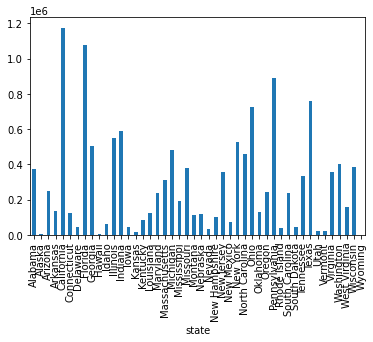

In [31]:
search = primary.candidate == 'Donald Trump'
vote1 = primary[search]
vote1 = vote1.groupby('state')['votes'].sum()
vote1.sort_values(ascending=False).head(10)
vote1.plot(kind='bar')

<AxesSubplot:xlabel='state'>

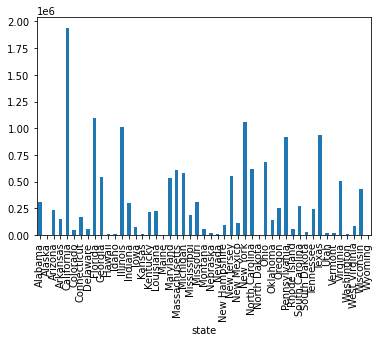

In [32]:
search = primary.candidate == 'Hillary Clinton'
vote2 = primary[search]
vote2 = vote2.groupby('state')['votes'].sum()
vote2.sort_values(ascending=False).head(10)
vote2.plot(kind='bar')

In [33]:
# 분석 2
search = (primary.candidate == 'Donald Trump') | (primary.candidate == 'Hillary Clinton')
vote3 = primary[search]
vote3.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551


<AxesSubplot:xlabel='state,party'>

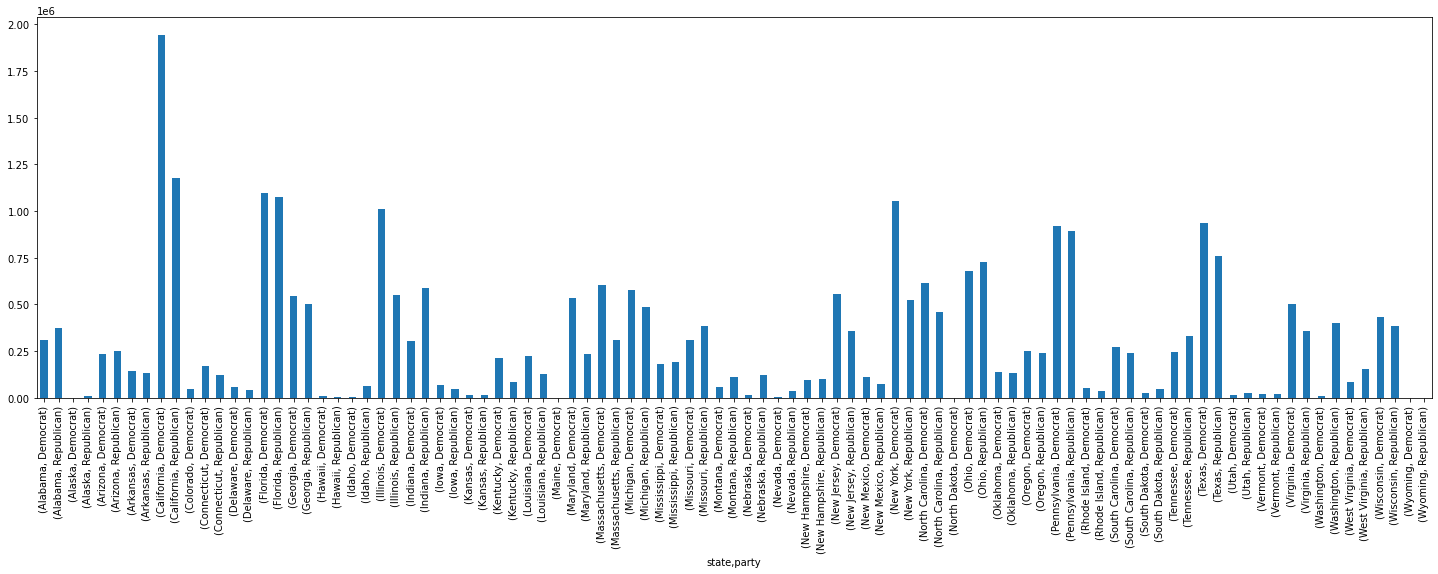

In [34]:
vote3a = vote3.groupby(['state','party'])['votes'].sum()
vote3a.plot(kind='bar', figsize=(25,7))

### 그룹핑한 결과는 다중인덱스를 가진 데이터프레임으로 출력
+ 1st index : state
+ 2st index : party
+ value : votes
+ 세로로 길게 출력되는 표 형태를 따름 : long table
    - 다중 인덱스 때문에 그래프가 제대로 출력되지 않음
    - '다중 인덱스를 각 열로 표시'하는 wide table형태로 작성해야 함
            - Long table -> wide table : unstack 함수를 사용
            - pivot_table 함수로 그룹핑 하면 wide하게 출력 됨

<AxesSubplot:xlabel='state'>

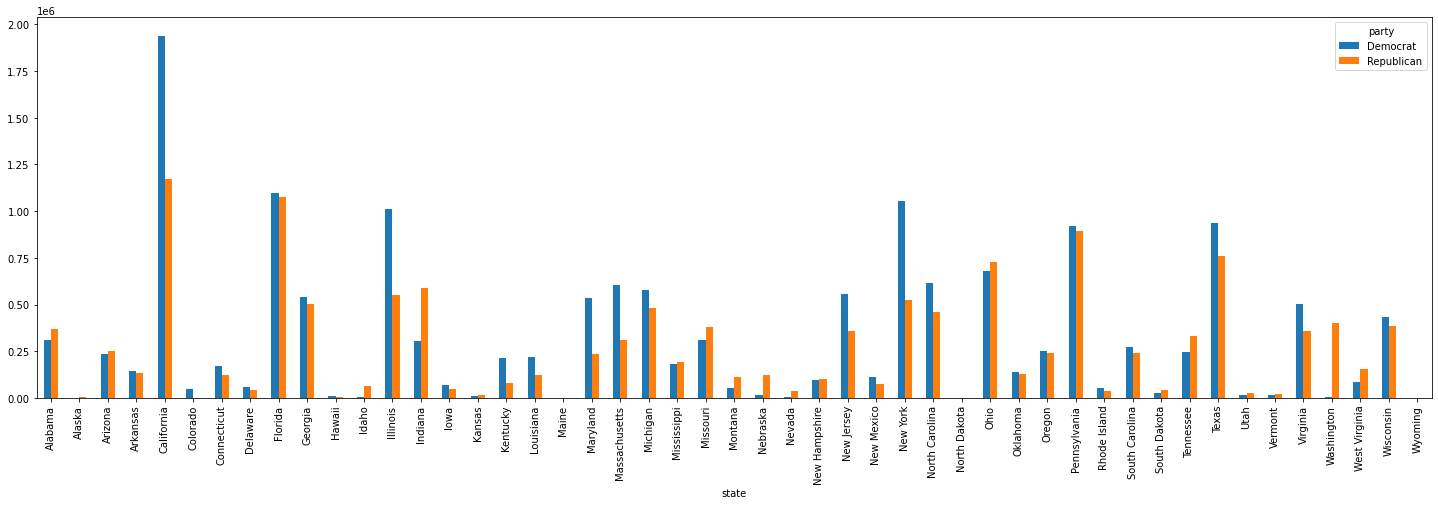

In [35]:
vote3b = vote3.pivot_table('votes','state','party', aggfunc=sum)
vote3b.plot(kind='bar', figsize=(25,7))

In [44]:
# 분석3
countries = pd.read_csv('csv/county_facts.txt')
countries.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,...,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,...,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,...,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,...,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,...,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,...,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [46]:
primary.columns
# fips : 연방정보처리코드(FederalInformathion Processing Standards)

Index(['state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate', 'votes',
       'fraction_votes'],
      dtype='object')

In [48]:
countries.columns

Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210', 'PST120214',
       'POP010210', 'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214',
       'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213', 'HSG010214',
       'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213', 'INC910213', 'INC110213',
       'PVY020213', 'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207',
       'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207', 'MAN450207', 'WTN220207',
       'RTN130207', 'RTN131207', 'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

In [49]:
# 백인 유권자들은 어느 정당 지지할지 알아봄
# countries 에서 RHI125214에 대한 fips 코드를 알아낸 다음 primary 집계를 해 봄
primary.head(10)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
6,Alabama,AL,Bibb,1007.0,Democrat,Bernie Sanders,246,0.197
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
8,Alabama,AL,Blount,1009.0,Democrat,Bernie Sanders,395,0.386
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551


In [55]:
# county 별로 득표수가 많은 후보가 당선됨
winvote = primary.groupby('fips')['votes'].agg('max')

In [56]:
# 득표수, 후보명, 정당
primary.groupby('fips').agg('max')

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001.0,Alabama,AL,Autauga,Republican,Ted Cruz,5387,0.800
1003.0,Alabama,AL,Baldwin,Republican,Ted Cruz,23618,0.647
1005.0,Alabama,AL,Barbour,Republican,Ted Cruz,2567,0.906
1007.0,Alabama,AL,Bibb,Republican,Ted Cruz,1959,0.755
1009.0,Alabama,AL,Blount,Republican,Ted Cruz,7390,0.551
...,...,...,...,...,...,...,...
95600032.0,Wyoming,WY,Campbell-Johnson,Republican,Ted Cruz,68,1.000
95600033.0,Wyoming,WY,Crook-Weston,Republican,Ted Cruz,27,0.466
95600034.0,Wyoming,WY,Converse-Niobrara,Republican,Ted Cruz,38,0.521


In [63]:
# 지역별 득표수가 많은 순으로 후보 정렬
primary.groupby('county')['votes'].agg('max')

county
Abbeville    1501
Abbot           1
Abington     1352
Acadia       1862
Accomack     2068
             ... 
Yuba         3210
Yuma         4390
Zapata       1969
Zavala       1557
Ziebach       132
Name: votes, Length: 2633, dtype: int64

In [68]:
# 지지계층별 후보별 득표수
primary.groupby(['fips','candidate','votes']).sum().head(10)

fraction_votes
fips   candidate       votes                
1001.0 Ben Carson      1764            0.146
       Bernie Sanders  544             0.182
       Donald Trump    5387            0.445
       Hillary Clinton 2387            0.800
       John Kasich     421             0.035
       Marco Rubio     1785            0.148
       Ted Cruz        2482            0.205
1003.0 Ben Carson      4221            0.084
       Bernie Sanders  2694            0.329
       Donald Trump    23618           0.469

In [67]:
primary.groupby(['county','candidate','votes']).sum().head(10)

fips  fraction_votes
county    candidate       votes                            
Abbeville Ben Carson      305       45001.0           0.083
          Bernie Sanders  312       45001.0           0.170
          Donald Trump    1353      45001.0           0.369
          Hillary Clinton 1501      45001.0           0.818
          Jeb Bush        236       45001.0           0.064
          John Kasich     157       45001.0           0.043
          Marco Rubio     740       45001.0           0.202
          Ted Cruz        876       45001.0           0.239
Abbot     Bernie Sanders  1      92300001.0           1.000
          Hillary Clinton 0      92300001.0           0.000

In [113]:
# 먼저 지역 county별 득표수가 많은 순으로 후보정렬
#민주당 후보만 추출
search = primary.party == 'Democrat'
demo = primary[search]

# fips 별 후보별 득표수 추출
result1 = demo.groupby(['fips','candidate','votes']).sum()
result1.sort_values(['fips','votes']).head(10)

fraction_votes
fips   candidate       votes                
1001.0 Bernie Sanders  544             0.182
       Hillary Clinton 2387            0.800
1003.0 Bernie Sanders  2694            0.329
       Hillary Clinton 5290            0.647
1005.0 Bernie Sanders  222             0.078
       Hillary Clinton 2567            0.906
1007.0 Bernie Sanders  246             0.197
       Hillary Clinton 942             0.755
1009.0 Bernie Sanders  395             0.386
       Hillary Clinton 564             0.551

In [84]:
# 추출한 결과를 내림차순으로 재정렬
result1.sort_values(['fips','votes'], ascending=False).head(10)

fraction_votes
fips       candidate       votes                
95000246.0 Bernie Sanders  311             0.928
           Hillary Clinton 24              0.072
95000245.0 Bernie Sanders  706             0.780
           Hillary Clinton 199             0.220
95000244.0 Bernie Sanders  76              0.884
           Hillary Clinton 10              0.116
95000243.0 Bernie Sanders  185             0.944
           Hillary Clinton 11              0.056
95000242.0 Bernie Sanders  306             0.927
           Hillary Clinton 23              0.070

In [88]:
# 각 결과에서 첫째 행(iloc[0])은 득표수가 많은 후보를 의미
# 지역별 경선에서 승리한 후보라는 의미
result1.sort_values(['fips','votes'], ascending=False).iloc[0]

fraction_votes    0.928
Name: (95000246.0, Bernie Sanders, 311), dtype: float64

##### groupby 에는 sort_values 함수를 적용하는 경우 결과가 예상한대로 나오지 않음
##### apply함수를 사용해서 재적용 해봄

In [98]:
# 각 지역별 경선에서 우승한 후보자를 뽑기 위해 Lambda식으로 함수 정의한 후 apply 함수를 적용함
vote_max = lambda x : x.sort_values(by='votes',ascending=False).iloc[0]

In [100]:
# 람다식으로 만든 함수를 집계로 적용해서  각 지역별 당선자와 득표수를 추출해 냄
winners = demo.groupby('fips').agg(vote_max)
winners.head()

/home/hadoop/.local/lib/python3.7/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001.0,Alabama,AL,Autauga,Democrat,Hillary Clinton,2387,0.800
1003.0,Alabama,AL,Baldwin,Democrat,Hillary Clinton,5290,0.647
1005.0,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906
1007.0,Alabama,AL,Bibb,Democrat,Hillary Clinton,942,0.755
1009.0,Alabama,AL,Blount,Democrat,Hillary Clinton,564,0.551


In [102]:
# fips를 기준으로 백인유권자 정보를 합침
# merge : 두 데이터프레임의 공통 컬럼을 기준으로 합침(Join)
# winners에 counties의 fips를 winners의 fips 인덱스를 기준으로 합침
winner_white = pd.merge(winners, countries[['fips','RHI125214']],how='left',right_on='fips', left_index=True)
winner_white.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,RHI125214
2.0,Alabama,AL,Autauga,Democrat,Hillary Clinton,2387,0.800,1001.0,77.9
3.0,Alabama,AL,Baldwin,Democrat,Hillary Clinton,5290,0.647,1003.0,87.1
4.0,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005.0,50.2
5.0,Alabama,AL,Bibb,Democrat,Hillary Clinton,942,0.755,1007.0,76.3
6.0,Alabama,AL,Blount,Democrat,Hillary Clinton,564,0.551,1009.0,96.0


In [112]:
# 주별 백인유권자 비율
winner_white.groupby(['state','county','candidate','RHI125214']).mean()

votes  fraction_votes     fips
state   county     candidate       RHI125214                                 
Alabama Autauga    Hillary Clinton 77.9       2387.0           0.800   1001.0
        Baldwin    Hillary Clinton 87.1       5290.0           0.647   1003.0
        Barbour    Hillary Clinton 50.2       2567.0           0.906   1005.0
        Bibb       Hillary Clinton 76.3        942.0           0.755   1007.0
        Blount     Hillary Clinton 96.0        564.0           0.551   1009.0
...                                              ...             ...      ...
Wyoming Sweetwater Bernie Sanders  94.3         12.0           0.545  56037.0
        Teton      Bernie Sanders  94.9          9.0           0.600  56039.0
        Uinta      Bernie Sanders  95.4          5.0           0.556  56041.0
        Washakie   Hillary Clinton 94.8          2.0           0.667  56043.0
        Weston     Bernie Sanders  95.0          1.0           0.500  56045.0

[2798 rows x 3 columns]

In [114]:
# 공화당 후보만 추출
search1 = primary.party == 'Republican'
repub = primary[search1]

# fips 별 후보별 득표수 추출
result2 = repub.groupby(['fips','candidate','votes']).sum()
result2.sort_values(['fips','votes']).head(10)

fraction_votes
fips   candidate    votes                
1001.0 John Kasich  421             0.035
       Ben Carson   1764            0.146
       Marco Rubio  1785            0.148
       Ted Cruz     2482            0.205
       Donald Trump 5387            0.445
1003.0 John Kasich  2987            0.059
       Ben Carson   4221            0.084
       Ted Cruz     8571            0.170
       Marco Rubio  9703            0.193
       Donald Trump 23618           0.469

In [116]:
winners2 = repub.groupby('fips').agg(vote_max)
winners2.head()

/home/hadoop/.local/lib/python3.7/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001.0,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445
1003.0,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469
1005.0,Alabama,AL,Barbour,Republican,Donald Trump,1710,0.501
1007.0,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494
1009.0,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487


In [117]:
winner_white1 = pd.merge(winners2, countries[['fips','RHI125214']],how='left',right_on='fips', left_index=True)
winner_white1.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,RHI125214
2.0,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,1001.0,77.9
3.0,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,1003.0,87.1
4.0,Alabama,AL,Barbour,Republican,Donald Trump,1710,0.501,1005.0,50.2
5.0,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,1007.0,76.3
6.0,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,1009.0,96.0


In [118]:
winner_white1.groupby(['state','county','candidate','RHI125214']).mean()

votes  fraction_votes     fips
state     county    candidate    RHI125214                                  
Alabama   Autauga   Donald Trump 77.9        5387.0           0.445   1001.0
          Baldwin   Donald Trump 87.1       23618.0           0.469   1003.0
          Barbour   Donald Trump 50.2        1710.0           0.501   1005.0
          Bibb      Donald Trump 76.3        1959.0           0.494   1007.0
          Blount    Donald Trump 96.0        7390.0           0.487   1009.0
...                                             ...             ...      ...
Wisconsin Waukesha  Ted Cruz     93.6       75123.0           0.610  55133.0
          Waupaca   Ted Cruz     97.4        5194.0           0.471  55135.0
          Waushara  Donald Trump 95.5        2391.0           0.451  55137.0
          Winnebago Ted Cruz     93.0       16049.0           0.469  55139.0
          Wood      Ted Cruz     95.4        7220.0           0.450  55141.0

[2711 rows x 3 columns]